# Submetric - Pools

Getting wet is one of the most fun things you can do during the summer, especially with how hot it can get in Pittsburgh during the summer. Luckily, Allegheny County is equipped with many community swimming pools and sprayparks. Using a dataset on the locations of these recreational water features, I will develop a metric for determining the best neighborhood in Pittsbugh for pools.

## Metric

There is not much data available to us on pools in Allegheny County other than their locations and whether they are a swimming pool or a spray park. So, our metric will be based on the number of these features in each neighborhood, valuing sprayparks higher as they are rarer.

## Analysis

First we import pandas and import our data.

In [42]:
import pandas as pd 
import geopandas as gp

# import dataset
pools = pd.read_csv("pools.csv")
pools.sample(5)

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
23,1404087945,Warrington Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Beltzhoover,3,18,42003562400,5,18,3,4-5,40.421590,-80.000948
19,1747129029,Riverview,Pool,NaN,Pittsburgh Water and Sewer Authority,205800.0,https://tools.wprdc.org/images/pittsburgh/pool...,Perry North,1,26,42003980400,1,26,1,1-15,40.479697,-80.018444
7,1475037865,Highland - Children,Pool,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482019,-79.911283
18,43656340,Ream,Pool,NaN,Pittsburgh Water and Sewer Authority,356000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Mount Washington,2,19,42003190300,5,19,3,4-27,40.430836,-80.013115
9,878134116,Homewood,Pool,NaN,Pittsburgh Water and Sewer Authority,171075.0,https://tools.wprdc.org/images/pittsburgh/pool...,Homewood South,9,13,42003130300,2,13,5,3-17,40.454370,-79.899884


Next we strip down our data.

In [43]:
pools = pools[['neighborhood','name','type']]
pools.sample(5)

,neighborhood,name,type
26,South Side Slopes,Arlington Spray Park,Spray Park
24,Polish Hill,West Penn,Pool
22,Allegheny Center,Sue Murray,Pool
25,Westwood,Westwood,Pool
17,Carrick,Phillips - Main,Pool


Then we split our data into pools and spray parks.

In [44]:
# split data into pools and sprayparks
sprayparks = pools.loc[pools['type'] == "Spray Park"]
pools = pools.loc[pools['type'] == "Pool"]

In [25]:
pools.head(5)

,neighborhood,name,type
0,Bedford Dwellings,Ammon,Pool
1,Banksville,Banksville,Pool
3,Bloomfield,Bloomfield,Pool
7,Highland Park,Highland - Children,Pool
8,Highland Park,Highland - Main,Pool


In [24]:
sprayparks.head(5)

,neighborhood,name,type
2,Beechview,Beechview Spray Park,Spray Park
4,Hazelwood,Burgwin Spray Park,Spray Park
5,Troy Hill,Cowley Spray Park,Spray Park
6,East Hills,East Hills Spray Park,Spray Park
13,Shadyside,Mellon Spray Park,Spray Park


Now we count the number of pools and spray parks for each neighborhood.

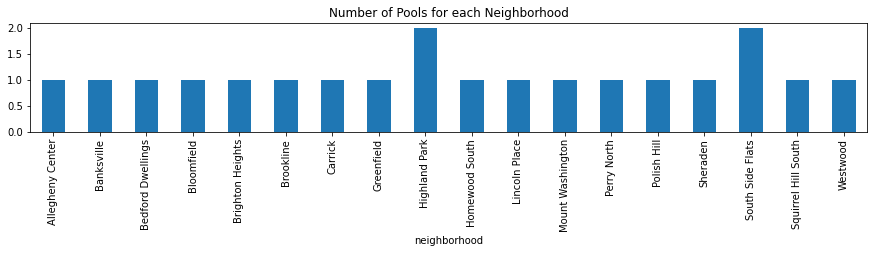

In [116]:
num_pools = pools.groupby('neighborhood')['name'].count()
num_pools.plot.bar(title="Number of Pools for each Neighborhood",  x="neighborhood",figsize=(15,2))

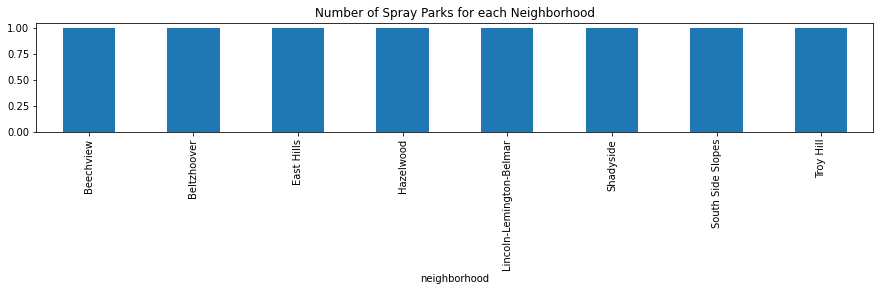

In [117]:
num_sprayparks = sprayparks.groupby('neighborhood')['name'].count()
num_sprayparks.plot.bar(title="Number of Spray Parks for each Neighborhood", x="neighborhood", figsize=(15,2))

Finally, we generate our metric. We multiply the number of spray parks by the ratio of pools to spray parks to account for their rareness. 

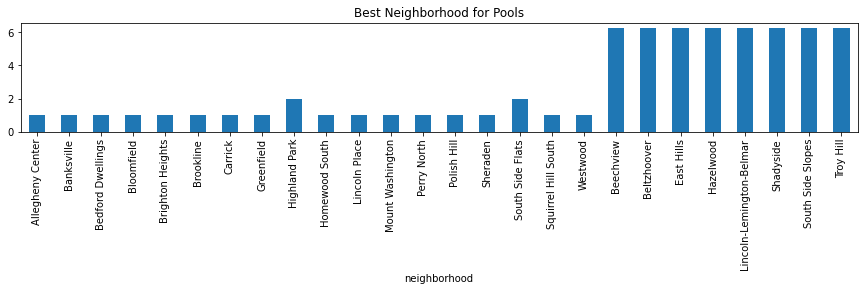

In [120]:
# Valuing spray parks higher in the metric given they are rarer
num_sprayparks = num_sprayparks * (len(pools)/len(sprayparks))

# The two datasets are concatenated, not merged, because their is no overlap between neighborhoods with pools and neighborhoods with spray parks
metric = pd.concat([num_pools, num_sprayparks])

metric.plot.bar(title="Best Neighborhood for Pools", x="neighborhood", figsize=(15,2))

In [121]:
metric.sort_values()

neighborhood
Allegheny Center            1.00
Westwood                    1.00
Squirrel Hill South         1.00
Sheraden                    1.00
Polish Hill                 1.00
Mount Washington            1.00
Lincoln Place               1.00
Homewood South              1.00
Perry North                 1.00
Greenfield                  1.00
Bedford Dwellings           1.00
Bloomfield                  1.00
Brighton Heights            1.00
Banksville                  1.00
Brookline                   1.00
Carrick                     1.00
South Side Flats            2.00
Highland Park               2.00
Beechview                   6.25
Beltzhoover                 6.25
East Hills                  6.25
Hazelwood                   6.25
Lincoln-Lemington-Belmar    6.25
Shadyside                   6.25
South Side Slopes           6.25
Troy Hill                   6.25
Name: name, dtype: float64

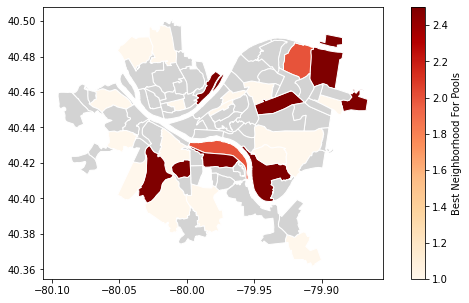

In [119]:
# Import neighborhood geometry data
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")

# merge our metric data with the geometry
metric = neighborhoods.merge(metric, how='left', left_on='hood', right_on='neighborhood')

# plot a map, name is the metric #
metric.plot(column="name",
            cmap='OrRd',              
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Best Neighborhood For Pools"}, 
               figsize=(10, 5),         
               missing_kwds={"color": "lightgrey"} 
           )
            